In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/content/aqi_database_new.csv")
df

,id,area,district,city,year,season,pm2_5,pm10,no2,aqi,...,rainfall_mm,pressure,wind_speed,population,vehicle_density,green_cover,coal_ban,policy_strength,terrain,elevation_m
0,3,"Bawana, Delhi",north west,Delhi,2019,Monsoon,34.0,40.0,17,106,...,199.2,996.7,4.2,140000,616,21.9,0,3,Plain,213
1,4,Burari Crossing,North Delhi,Delhi,2022,Summer,93.5,227.5,45,201,...,97.6,995.8,2.9,140000,370,23.1,1,3,Plain,210
2,6,Tongzhou Beiyuan,Tongzhou,Beijing,2013,Summer,94.0,168.0,54,172,...,161.0,999.0,3.4,112000,229,18.0,0,2,Plain,35
3,7,Dongsi,Dongcheng,Beijing,2013,Winter,158.0,192.0,72,265,...,3.0,1028.0,1.8,85000,235,12.0,0,2,Plain,42
4,9,Anand Vihar,East delhi,Delhi,2022,Winter,380.0,540.0,92,480,...,8.0,993.0,1.2,105000,410,10.0,1,2,Plain,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,68,Dwarka,South West,Delhi,2025,Summer,95.0,210.0,45,205,...,42.0,974.0,3.6,170000,375,25.0,0,5,Plain,212
64,69,Yanqing,Badaling,Beijing,2025,Winter,20.0,42.0,12,42,...,12.0,1038.0,5.5,13000,115,68.0,1,5,Mountain,610
65,70,Aya Nagar,South,Delhi,2024,Winter,290.0,440.0,65,390,...,6.0,988.0,3.2,38000,320,32.0,0,5,Ridge,242
66,71,Changping,Changping,Beijing,2023,Summer,38.0,72.0,26,92,...,165.0,1008.0,3.5,22000,175,52.0,1,5,Mountain,180


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               68 non-null     int64  
 1   area             68 non-null     object 
 2   district         68 non-null     object 
 3   city             68 non-null     object 
 4   year             68 non-null     int64  
 5   season           68 non-null     object 
 6   pm2_5            68 non-null     float64
 7   pm10             68 non-null     float64
 8   no2              68 non-null     int64  
 9   aqi              68 non-null     int64  
 10  aqi_category     68 non-null     object 
 11  temperature      68 non-null     float64
 12  rainfall_mm      68 non-null     float64
 13  pressure         68 non-null     float64
 14  wind_speed       68 non-null     float64
 15  population       68 non-null     int64  
 16  vehicle_density  68 non-null     int64  
 17  green_cover      6

In [7]:
df.isnull().sum()


,0
id,0
area,0
district,0
city,0
year,0
season,0
pm2_5,0
pm10,0
no2,0
aqi,0


In [8]:
df.groupby('city')['aqi'].mean()


,aqi
city,
Beijing,127.944444
Delhi,304.750000


In [9]:
df.groupby('season')['aqi'].mean()

,aqi
season,
Monsoon,97.222222
Post-Mon,322.625000
Post-monsoon,247.500000
Spring,82.000000
Summer,138.304348
Winter,294.250000


In [10]:

df['season'] = df['season'].replace({
    'Post-monsoon': 'Post-Mon',
    'Post Mon': 'Post-Mon'
}) # this is to make both these different name yet same categories one

# Verify
print(df['season'].unique())


['Monsoon' 'Summer' 'Winter' 'Post-Mon' 'Spring']


We will see realtion in numerical data

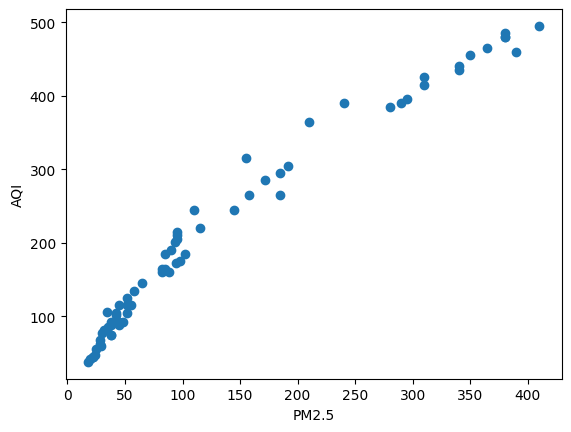

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['pm2_5'], df['aqi'])
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()


There is directly proportional realtionship between PM2.5 and AQi.


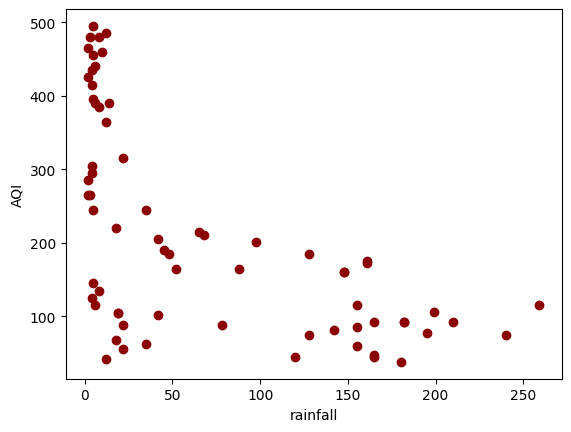

In [12]:
plt.scatter(df['rainfall_mm'], df['aqi'],color='darkred')
plt.xlabel('rainfall')
plt.ylabel('AQI')
plt.show()


Water can wash off the pollutants in the air , that is in monsoon season air quality is more likely to be good.

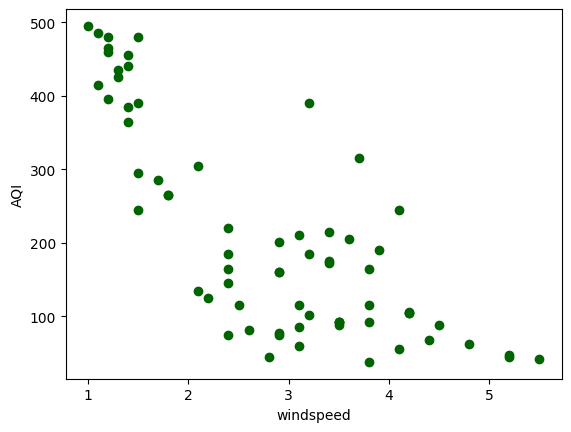

In [13]:
plt.scatter(df['wind_speed'], df['aqi'],color='darkgreen')
plt.xlabel('windspeed')
plt.ylabel('AQI')
plt.show()


Higher wind speeds generally improve Air Quality Index (AQI) by dispersing pollutants, reducing their concentration, while calm winds allow pollutants to accumulate, leading to worse AQI

In [14]:
df.groupby('district').size()


,0
district,
Badaling,1
Beiyuan,1
Changping,2
Chaoyang,2
Daxing,2
Dingling,1
Dongcheng,3
East,3
East delhi,2


In [15]:
df.groupby('season').size()


,0
season,
Monsoon,9
Post-Mon,10
Spring,2
Summer,23
Winter,24


In [16]:
season_pm25 = df.groupby('season')['pm2_5'].mean()

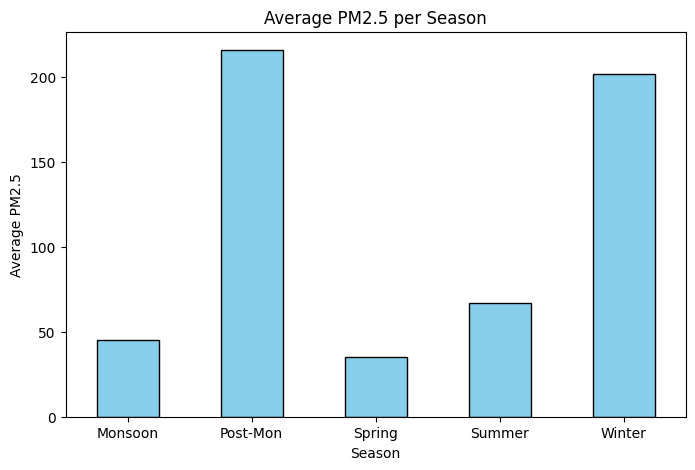

In [17]:
plt.figure(figsize=(8,5))
season_pm25.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Average PM2.5 per Season')
plt.xlabel('Season')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=0)
plt.show()

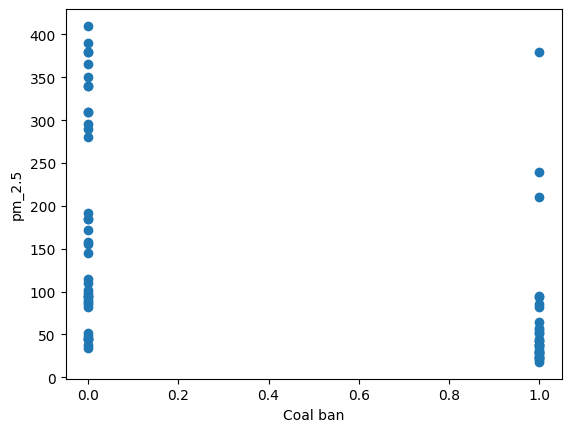

In [18]:
plt.scatter(df['coal_ban'],df['pm2_5'])
plt.xlabel('Coal ban')
plt.ylabel('pm_2.5')
plt.show()

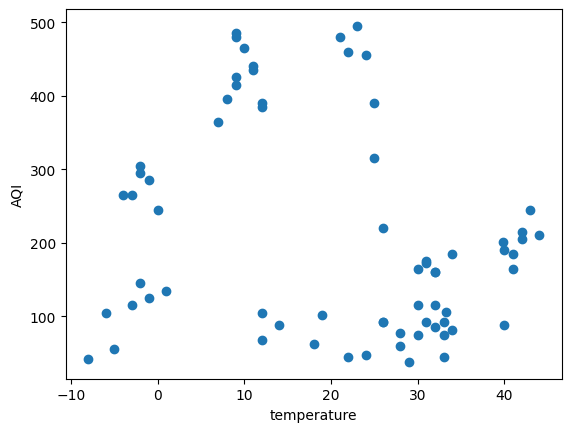

In [19]:
plt.scatter(df['temperature'], df['aqi'])
plt.xlabel('temperature')
plt.ylabel('AQI')
plt.show()

In [20]:
dv=df.groupby('city').size()


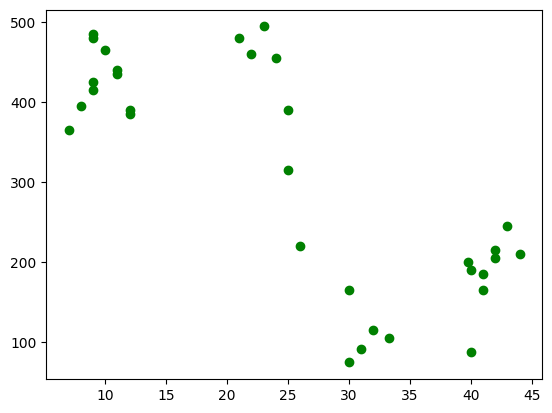

In [21]:
plt.figure()
delhi_data=df[df['city']=='Delhi']
plt.scatter(delhi_data['temperature'],delhi_data['aqi'],color='green')


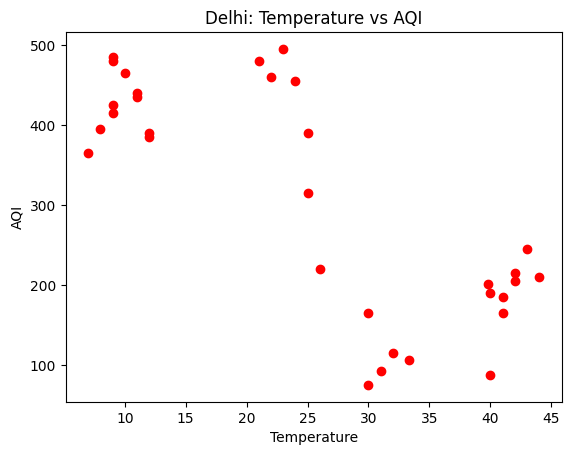

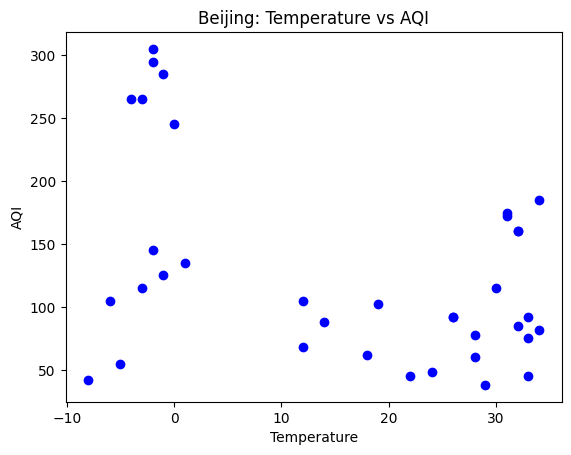

In [22]:

plt.figure() # To create first page or first plot in same sheet
delhi_data = df[df['city'] == 'Delhi']
plt.scatter(delhi_data['temperature'], delhi_data['aqi'], color='red')
plt.title('Delhi: Temperature vs AQI')
plt.xlabel('Temperature')
plt.ylabel('AQI')


plt.figure() # for second one
beijing_data = df[df['city'] == 'Beijing']
plt.scatter(beijing_data['temperature'], beijing_data['aqi'], color='blue')
plt.title('Beijing: Temperature vs AQI')
plt.xlabel('Temperature')
plt.ylabel('AQI')

plt.show()

In [23]:
terrain_aqi_avg=df.groupby('terrain')['aqi'].mean()

In [24]:
terrain_aqi_avg

,aqi
terrain,
Floodplain,430.000000
Mountain,66.444444
Plain,227.264151
Plateau,105.000000
Ridge,352.500000
Valley,45.000000


In [25]:
df.groupby('terrain').size()

,0
terrain,
Floodplain,2
Mountain,9
Plain,53
Plateau,1
Ridge,2
Valley,1


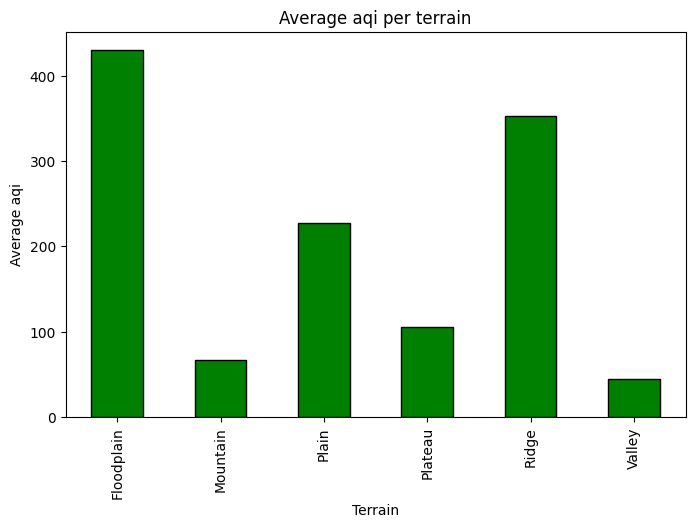

In [26]:
plt.figure(figsize=(8,5))
terrain_aqi_avg.plot(kind='bar',color='green',edgecolor='black')
plt.title('Average aqi per terrain')
plt.xlabel('Terrain')
plt.ylabel('Average aqi')
plt.show()

#as our data is very low we have very few columns for



Problem :- On this data we can not rely that much, as we can see we have very less entries for some sub categories, this can make the data bias.


Solution : We will group the data in one category by making two sub categories.

In [27]:
df['terrain_cate'] = df['terrain'].replace({
    'Floodplain': 'Lowland',
    'Plain': 'Lowland',
    'Valley':'Lowland',
    'Mountain':'Highland',
    'Plateau':'Highland',
    'Ridge':'Highland'
})
df.head()



,id,area,district,city,year,season,pm2_5,pm10,no2,aqi,...,pressure,wind_speed,population,vehicle_density,green_cover,coal_ban,policy_strength,terrain,elevation_m,terrain_cate
0,3,"Bawana, Delhi",north west,Delhi,2019,Monsoon,34.0,40.0,17,106,...,996.7,4.2,140000,616,21.9,0,3,Plain,213,Lowland
1,4,Burari Crossing,North Delhi,Delhi,2022,Summer,93.5,227.5,45,201,...,995.8,2.9,140000,370,23.1,1,3,Plain,210,Lowland
2,6,Tongzhou Beiyuan,Tongzhou,Beijing,2013,Summer,94.0,168.0,54,172,...,999.0,3.4,112000,229,18.0,0,2,Plain,35,Lowland
3,7,Dongsi,Dongcheng,Beijing,2013,Winter,158.0,192.0,72,265,...,1028.0,1.8,85000,235,12.0,0,2,Plain,42,Lowland
4,9,Anand Vihar,East delhi,Delhi,2022,Winter,380.0,540.0,92,480,...,993.0,1.2,105000,410,10.0,1,2,Plain,202,Lowland


In [28]:
terraincate_aqi_avg=df.groupby('terrain_cate')['aqi'].mean()

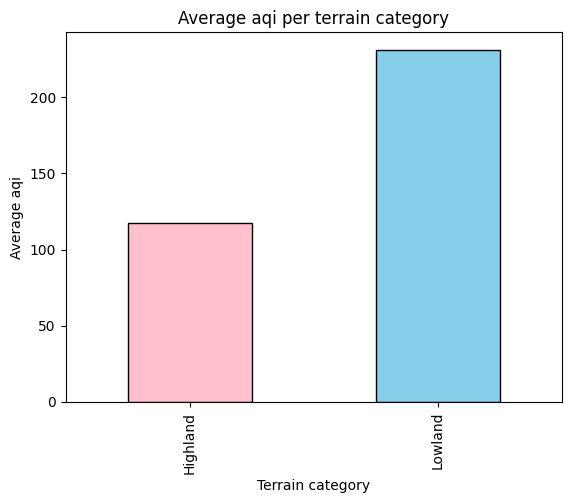

In [29]:
colours=['pink', 'skyblue']
terraincate_aqi_avg.plot(kind='bar',color=colours[:len(colours)],edgecolor='black')
plt.title('Average aqi per terrain category')
plt.xlabel('Terrain category')
plt.ylabel('Average aqi')
plt.show()

On highlands like mountain etc , due to less human activities air quality is generally found good.

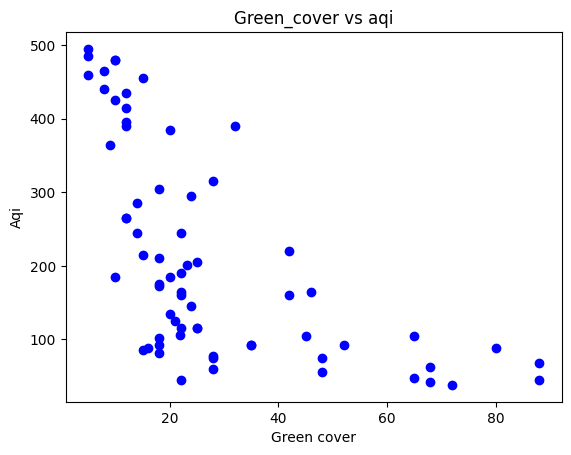

In [30]:
plt.scatter(df['green_cover'],df['aqi'],color='blue')
plt.title('Green_cover vs aqi')
plt.xlabel('Green cover')
plt.ylabel('Aqi')
plt.show()

High Green cover generally reduces Aqi.

<Axes: xlabel='coal_ban', ylabel='count'>

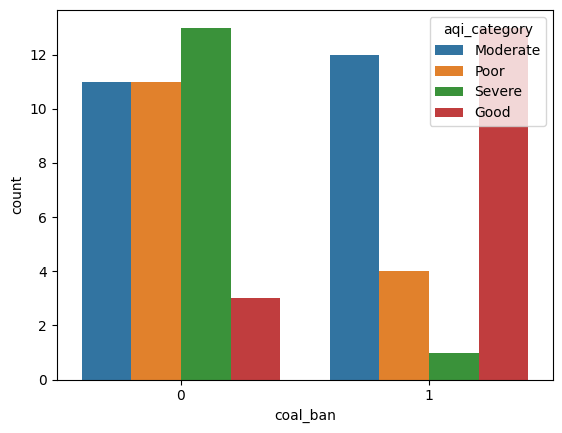

In [31]:
sns.countplot(x='coal_ban', hue='aqi_category', data=df)



We can see when there was a coal ban Aqi category was mostly good.


When there was no coal ban the Aqi category was generally severe.

<Axes: xlabel='season', ylabel='count'>

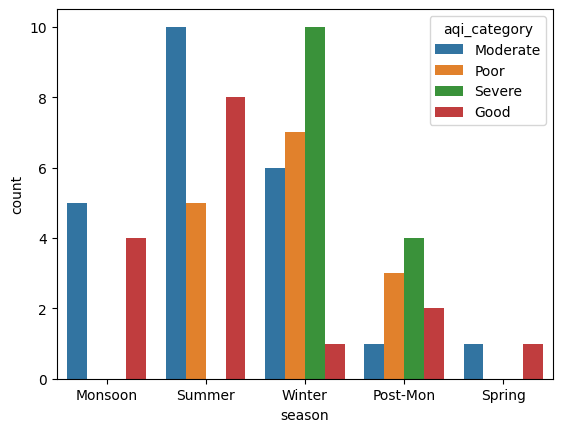

In [32]:
sns.countplot(data=df, x='season', hue='aqi_category')


In [33]:
beijing_df = df[df['city'] == 'Beijing']
beijing_df['policy_period'] = beijing_df['year'].apply(
    lambda x: 'Before 2013' if x < 2013 else 'After 2013'
)


/tmp/ipython-input-1784978407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df['policy_period'] = beijing_df['year'].apply(


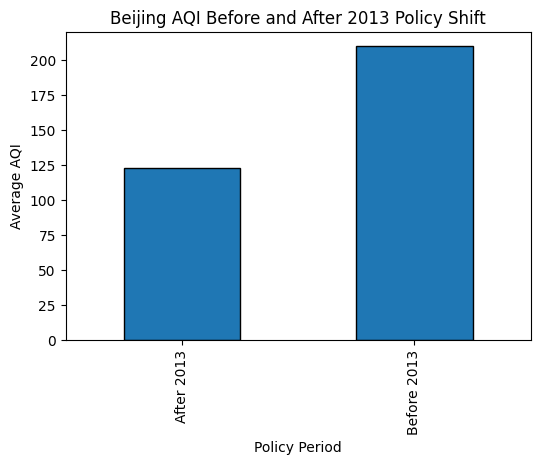

In [34]:
aqi_policy = beijing_df.groupby('policy_period')['aqi'].mean()

plt.figure(figsize=(6,4))
aqi_policy.plot(kind='bar', edgecolor='black')
plt.title('Beijing AQI Before and After 2013 Policy Shift')
plt.xlabel('Policy Period')
plt.ylabel('Average AQI')
plt.show()


Average AQI in Beijing reduced significantly after the 2013 policy shift, indicating effective pollution control measures

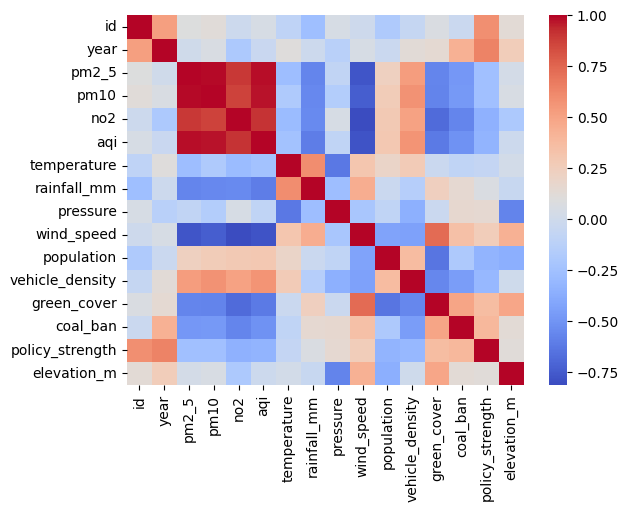

In [38]:
corr = df.select_dtypes('number').corr()
sns.heatmap(corr, cmap='coolwarm')
plt.show()

Through this heatmap we can see directly proportional relationships among pm 2.5 , pm10 , NO2 and AQI .

But we can also see the inversely proportional relationships among features like wind speed with pm2.5, pm10, no2 , and aqi.


Inversely proportional relationship green cover with pollutanats.

But we can also see if extreme high corelationship between id and year but that is of no use for us and there is no actual relationship so we would drop id because that is basically noise to us.

Vehicle density also has a high relationship with pollutants.

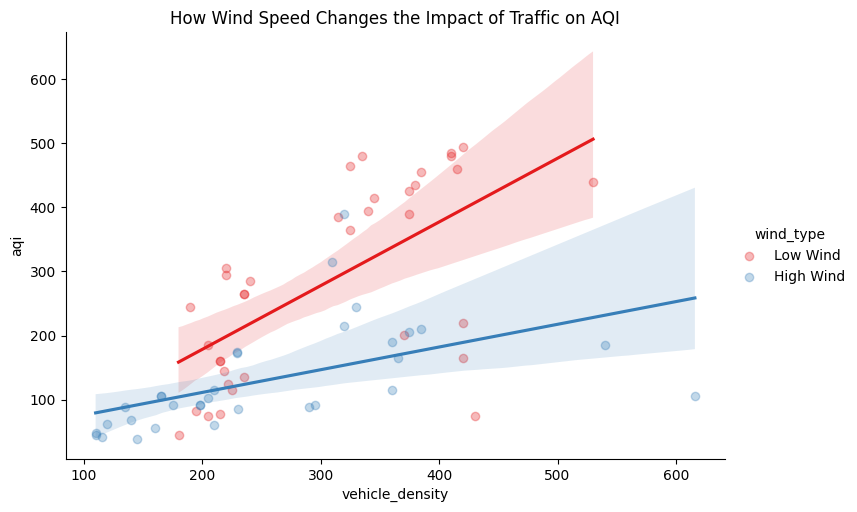

In [36]:


# a categorical version of Wind Speed (Binning)
#qcut bins the numerical continuous values into group of discrete values
#in this case it will bin them in 50-50
df['wind_type'] = pd.qcut(df['wind_speed'], q=2, labels=['Low Wind', 'High Wind'])

# the Grouped Scatter Plot (lmplot)
sns.lmplot(x='vehicle_density', y='aqi', hue='wind_type', data=df,
           palette='Set1', aspect=1.5, scatter_kws={'alpha':0.3})

plt.title('How Wind Speed Changes the Impact of Traffic on AQI')
plt.show()

While vehicle density and wind speed are physically independent of one another, this graph demonstrates a significant interaction effect between them regarding their impact on AQI.

Specifically, the data reveals that wind speed acts as a moderator: when wind speed is low, increases in vehicle density lead to a much more dramatic rise in AQI compared to periods of high wind. This confirms that the combined effect of these factors changes the overall outcome more than either feature would individually

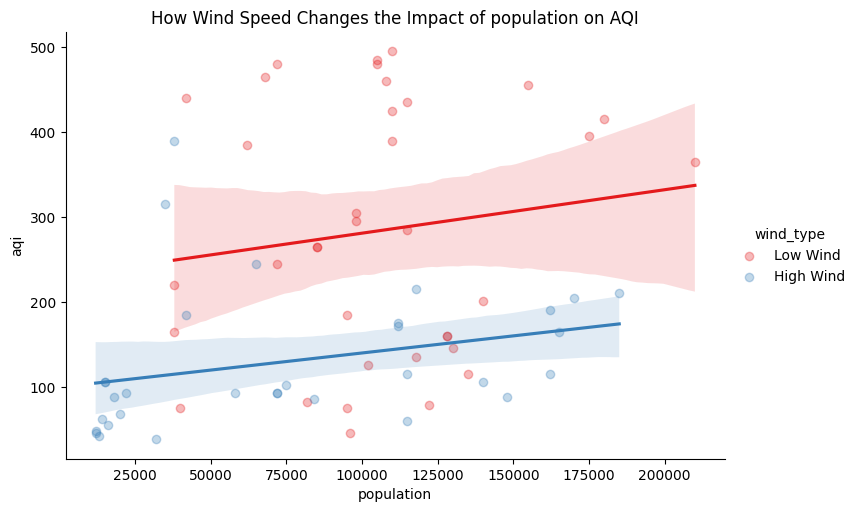

In [37]:
df['wind_type'] = pd.qcut(df['wind_speed'], q=2, labels=['Low Wind', 'High Wind'])

# the Grouped Scatter Plot (lmplot)
sns.lmplot(x='population', y='aqi', hue='wind_type', data=df,
           palette='Set1', aspect=1.5, scatter_kws={'alpha':0.3})

plt.title('How Wind Speed Changes the Impact of population on AQI')
plt.show()

Unlike the traffic plot where the lines were likely to intersect significantly, these two lines are nearly parallel.This suggests a weak interaction.

While low wind (red) results in higher overall pollution, the rate at which pollution increases as the population grows is almost the same for both wind types.

In contrast to the traffic plot where the lines intersected at a significant point, these two lines remain nearly parallel.

This depicts that multiplying population and wind_speed might not be as powerful of a feature for our model as multiplying vehicle_density and wind_speed.